In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import gen_fbm_nn_model as fbm_nn

In [3]:
def load_nn_model(window_size,n_samples=10000,n_epochs=100):

    try:
        model = tf.keras.models.load_model("model3dense_n{}.h5".format(window_size))
    except OSError:
        fbm_nn.__main__(n_samples,window_size,n_epochs)
        model = tf.keras.models.load_model("model3dense_n{}.h5".format(window_size))
    return model

def get_model_metrics(window_size,n_samples=10000,n_epochs=100):
    
    model = load_nn_model(window_size, n_samples, n_epochs)
    
    loss, mean_abs_error, mean_sqr_error = np.loadtxt('metrics_'+"model3dense_n"+str(window_size), comments='#')
    
    return loss, mean_abs_error, mean_sqr_error

In [4]:
window_sizes = [12,13,14,15,16,17,18,19,20,21,22,23,24,25]
loss_values = []
mean_abs_errors = []
mean_sqr_errors = []

for w in window_sizes:
    print('Window size: ', w)
    loss, mae, mse = get_model_metrics(w)
    loss_values.append(loss)
    mean_abs_errors.append(mae)
    mean_sqr_errors.append(mse)

Window size:  12
Window size:  13
Window size:  14
Window size:  15
Window size:  16
Window size:  17
Window size:  18
Window size:  19
Window size:  20
Window size:  21
Window size:  22
Window size:  23
Window size:  24
Window size:  25


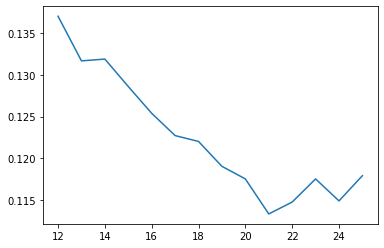

In [5]:
plt.figure()
plt.plot(window_sizes, mean_abs_errors)

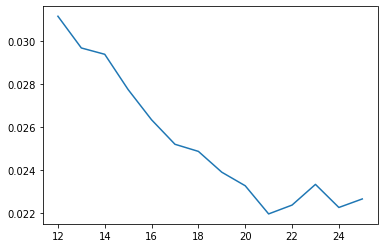

In [6]:
plt.figure()
plt.plot(window_sizes, mean_sqr_errors)

In [12]:
def filter_data(data_in, max_step_size, window, restriction):
    """
    Only keeps data for tracks that are long enough for hurst exponent estimation at a given downsampling step size.
    Args: 
        data_in: pandas dataframe, original data
        max_step_size: int, maximum downsampling step size
        window: int, size of rolling window for hurst component estimation
        restriction: int, number of tracks to include
    Returns:
        filtered_data: pandas dataframe
    """
    if window % 2 == 1:  # for odd window size
        tracks_to_keep = data_in.TrackID.value_counts().loc[lambda x: (x//max_step_size) > (window)].reset_index()['index']
    else:  # for even window size
        tracks_to_keep = data_in.TrackID.value_counts().loc[lambda x: (x//max_step_size) > (window+1)].reset_index()['index']
    
    if restriction<len(tracks_to_keep):
        filtered_data = data_in[data_in['TrackID'].isin(tracks_to_keep[:restriction])]
    else:
        filtered_data = data_in[data_in['TrackID'].isin(tracks_to_keep)]

    return filtered_data

def number_of_tracks(filenames, window, step_sizes=np.array([1,2,3,4,5,6,7,8,9,10]), pandas_df=True):
    """
    """
    ntracks_dict = {}
    
    for i, file in enumerate(filenames):
        data = pd.read_csv('haemocyte_tracking_data/'+file+'.csv')
        ntracks = np.empty((len(step_sizes)+1))
        ntracks[0] = len(np.unique(data['TrackID']))  # number of tracks in original data (independent of window, step size)
        for j, s in enumerate(step_sizes):
            filtered_data = filter_data(data, s, window, restriction=10000)
            ntracks[j+1] = len(np.unique(filtered_data['TrackID']))  # number of tracks in filtered data
        ntracks_dict[file] = ntracks.tolist()
    
    if not pandas_df:
        return ntracks_dict
    
    else:
        column_labels = np.array(['original'])
        column_labels = np.append(column_labels, step_sizes.astype(str))
        df = pd.DataFrame.from_dict(ntracks_dict, orient='index', columns=column_labels)
        return df.apply(pd.to_numeric, downcast='integer')

In [14]:
filenames = np.array(['Control_frame001-200',
                      'Control_frame200-400',
                      'Control_frame400-600',
                      'Control_frame600-800',
                      'Control_frame800-1000',
                      'Control_frame1000-1200',
                      'LanB1_frame001-200',
                      'LanB1_frame200-400',
                      'LanB1_frame400-600',
                      'LanB1_frame600-800',
                      'LanB1_frame800-1000',
                      'LanB1_frame1000-1200',
                      'defLanB1_300817_frame200-400',
                      'defLanB1_300817_frame400-600'])

print('For window ', window_sizes[5])
number_of_tracks(filenames, window_sizes[5])

For window  17


,original,1,2,3,4,5,6,7,8,9,10
Control_frame001-200,1806,1535,766,434,247,149,100,66,43,29,21
Control_frame200-400,1468,1343,820,526,333,230,147,106,86,66,50
Control_frame400-600,2172,2053,1309,848,564,397,293,234,180,142,104
Control_frame600-800,2117,2030,1345,870,616,449,348,262,202,162,132
Control_frame800-1000,1725,1675,1221,827,603,468,343,286,225,182,143
Control_frame1000-1200,1624,1571,1218,825,597,442,333,262,222,184,157
LanB1_frame001-200,4793,1517,666,355,211,128,84,61,44,29,21
LanB1_frame200-400,7239,2038,995,553,351,243,175,129,97,67,49
LanB1_frame400-600,3091,1124,661,457,337,256,190,150,117,94,78
LanB1_frame600-800,5046,1734,1051,714,547,424,337,277,238,202,168


In [15]:
def ntracks_mean_over_files(dataframe, window, step_size):
    # for one step size
    ntracks_all_files = dataframe['{}'.format(step_size)]
    return np.mean(ntracks_all_files)

In [17]:
# number of tracks for step size 8
step = 8
ntracks_step_8 = []
for w in window_sizes:
    print('Window size: ', w)
    ntracks_df = number_of_tracks(filenames, w)
    ntracks_step_8.append(ntracks_mean_over_files(ntracks_df, w, step))

Window size:  12
Window size:  13
Window size:  14
Window size:  15
Window size:  16
Window size:  17
Window size:  18
Window size:  19
Window size:  20
Window size:  21
Window size:  22
Window size:  23
Window size:  24
Window size:  25


Text(0, 0.5, 'average number of tracks at step size 8')

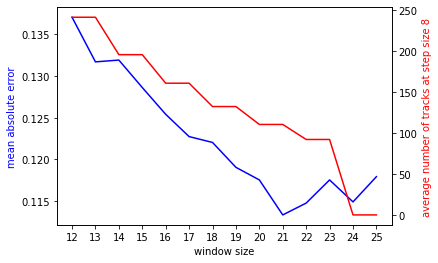

In [26]:
fig,ax = plt.subplots()
ax.plot(window_sizes, mean_abs_errors, color='b')
ax.set_xlabel('window size')
ax.set_xticks(window_sizes)
ax.set_ylabel('mean absolute error', color='b')
ax2 = ax.twinx()
ax2.plot(window_sizes, ntracks_step_8, color='r')
ax2.set_ylabel('average number of tracks at step size {}'.format(step), color='r')

In [43]:
param = np.empty(len(window_sizes))  # parameter to maximize
for i in range(len(window_sizes)):
    param[i] = (ntracks_step_8[i]/(max(ntracks_step_8)-min(ntracks_step_8))) - (mean_abs_errors[i]/(max(mean_abs_errors)-min(mean_abs_errors)))
best_window = window_sizes[np.argmax(param)]

print(param)

[-4.79339568 -4.56764247 -4.76608019 -4.62717127 -4.6360993  -4.52339315
 -4.61177665 -4.48580906 -4.51280422 -4.33570338 -4.47162519 -4.58872724
 -4.8591997  -4.98687247]


In [44]:
best_window

21